# Customer Segmentation

Using PCA and unsupervised clustering methods, cluster customers based on customer features


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in dataframe
df_main = pd.read_csv("Resources/digested/ecommerce_data_ML.csv")

In [3]:
# Inspection
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             250000 non-null  int64  
 1   purchase_date           250000 non-null  object 
 2   is_electronics          250000 non-null  int64  
 3   is_home                 250000 non-null  int64  
 4   is_clothing             250000 non-null  int64  
 5   is_books                250000 non-null  int64  
 6   product_price           250000 non-null  int64  
 7   quantity                250000 non-null  int64  
 8   total_purchased_amount  250000 non-null  int64  
 9   is_credit               250000 non-null  int64  
 10  is_crypto               250000 non-null  int64  
 11  is_paypal               250000 non-null  int64  
 12  is_cash                 250000 non-null  int64  
 13  customer_age            250000 non-null  int64  
 14  returned            

In [4]:
# Inspection
df_main.head()

customer_id purchase_date  is_electronics  is_home  is_clothing  is_books  \
0        46251    2020-09-08               1        0            0         0   
1        46251    2022-03-05               0        1            0         0   
2        46251    2022-05-23               0        1            0         0   
3        46251    2020-11-12               0        0            1         0   
4        13593    2020-11-27               0        1            0         0   

   product_price  quantity  total_purchased_amount  is_credit  is_crypto  \
0             12         3                     740          1          0   
1            468         4                    2739          0          0   
2            288         2                    3196          0          0   
3            196         1                    3509          0          0   
4            449         1                    3452          1          0   

   is_paypal  is_cash  customer_age  returned  gender_1m_0f  churn  
0          0        0            37       0.0             1      0  
1          0        0            37       0.0             1      0  
2          0        0            37       0.0             1      0  
3          0        0            37       0.0             1      0  
4          0        0            49       0.0             0      1

In [5]:
# Encode gender
df_main['gender'] = np.where(df_main['gender_1m_0f'] == 'Male', 1, 0)
df_main.head()

customer_id purchase_date  is_electronics  is_home  is_clothing  is_books  \
0        46251    2020-09-08               1        0            0         0   
1        46251    2022-03-05               0        1            0         0   
2        46251    2022-05-23               0        1            0         0   
3        46251    2020-11-12               0        0            1         0   
4        13593    2020-11-27               0        1            0         0   

   product_price  quantity  total_purchased_amount  is_credit  is_crypto  \
0             12         3                     740          1          0   
1            468         4                    2739          0          0   
2            288         2                    3196          0          0   
3            196         1                    3509          0          0   
4            449         1                    3452          1          0   

   is_paypal  is_cash  customer_age  returned  gender_1m_0f  churn  gender  
0          0        0            37       0.0             1      0       0  
1          0        0            37       0.0             1      0       0  
2          0        0            37       0.0             1      0       0  
3          0        0            37       0.0             1      0       0  
4          0        0            49       0.0             0      1       0

C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


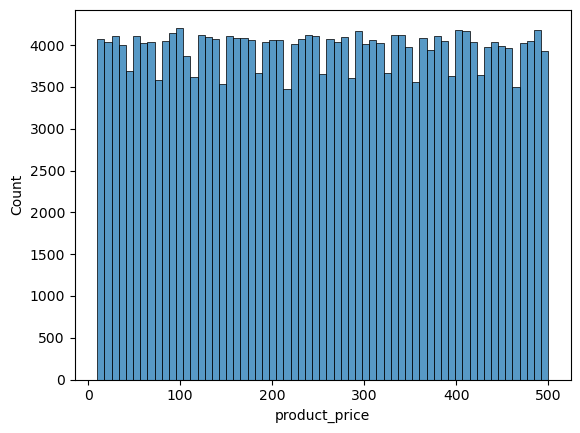

C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


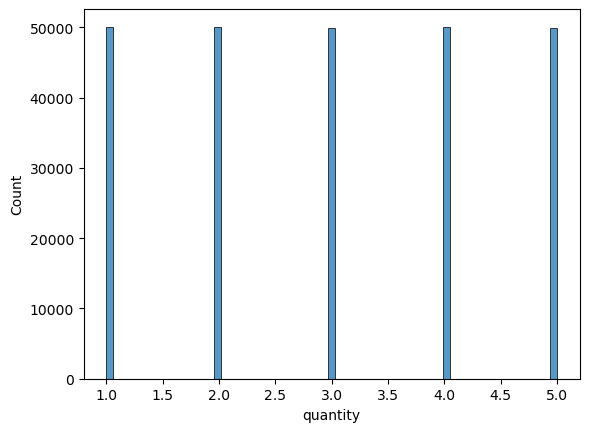

C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


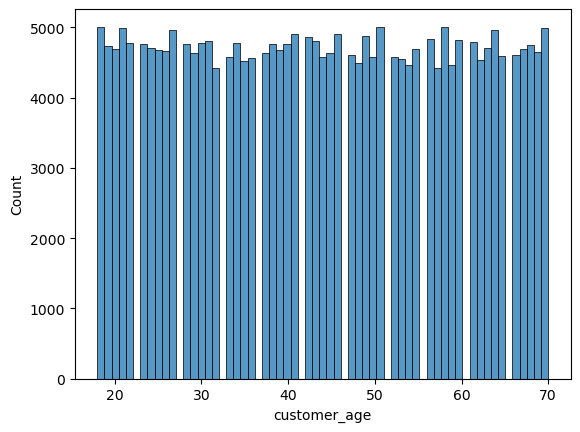

C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


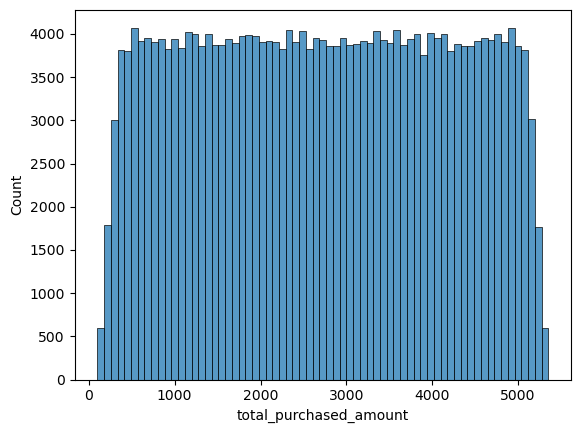

<Figure size 640x480 with 0 Axes>

In [6]:
col_to_scale = ['product_price', 'quantity', 'customer_age', 'total_purchased_amount']
for col in col_to_scale:
    sns.histplot(df_main[col])
    plt.show()
    plt.clf()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

col_to_scale = ['product_price', 'quantity', 'customer_age', 'total_purchased_amount']
scaler = ColumnTransformer(
    transformers=[
        ('sc', StandardScaler(), col_to_scale)
    ],
    remainder='passthrough'
)

df_transformed = scaler.fit_transform(df_main)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.columns = col_to_scale + [col for col in df_main.columns if col not in col_to_scale]
df_transformed = df_transformed[df_main.columns]
df_transformed.drop(["purchase_date",
                     "returned",
                     "customer_id",
                     "churn",
                     "is_credit",
                     "is_crypto",
                     "is_paypal",
                     "is_cash",
                     "gender"], axis=1, inplace=True)

<Axes: >

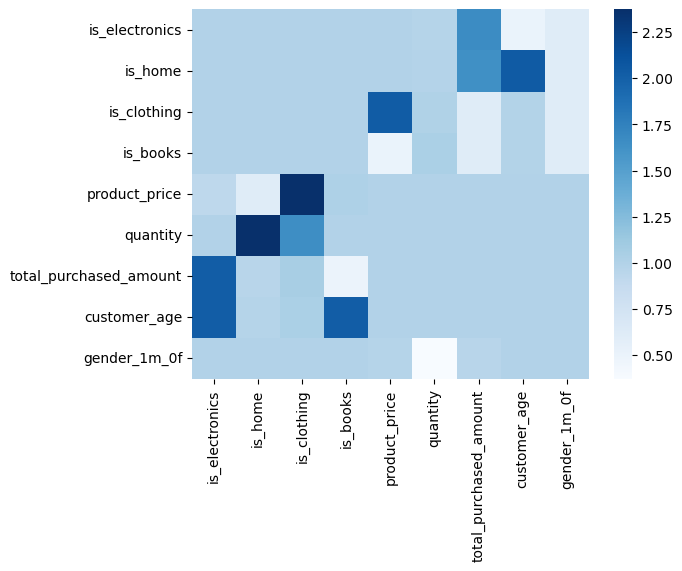

In [8]:
# PCA
pca = PCA()
components = pca.fit(df_transformed).components_
components = pd.DataFrame(np.exp(components), columns=df_transformed.columns).T
components.columns = df_transformed.columns

sns.heatmap(components, cmap='Blues')

In [9]:
var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(var_ratio)
var_ratio = pd.DataFrame(np.array(['{:.3f}'.format(n) for n in var_ratio]), index=df_transformed.columns)
var_ratio['cumsum'] = cumulative_variance

var_ratio

0    cumsum
is_electronics          0.211  0.210865
is_home                 0.200  0.411304
is_clothing             0.200  0.611598
is_books                0.190  0.801605
product_price           0.060  0.861713
quantity                0.050  0.911810
total_purchased_amount  0.048  0.959908
customer_age            0.040  1.000000
gender_1m_0f            0.000  1.000000

In [10]:
pca = PCA(n_components=8)
df_pcomp = pca.fit_transform(df_transformed)
df_pcomp = pd.DataFrame(df_pcomp, columns=df_transformed.columns[:8])
df_pcomp

is_electronics   is_home  is_clothing  is_books  product_price  \
0            -1.144490  0.921988    -1.579582  0.618172      -0.018378   
1            -0.440478 -0.131765     1.637901 -0.294376      -0.015633   
2            -0.110621 -0.729905    -0.147508 -0.541941      -0.011677   
3             0.096890 -1.023398    -1.049281 -0.710264       0.700216   
4             0.471507 -1.934708     0.517633 -0.089844       0.015834   
...                ...       ...          ...       ...            ...   
249995        0.229506 -0.695360    -0.201226  0.777490       0.698938   
249996        0.478670 -0.437676    -2.061031 -0.554351       0.013409   
249997       -0.123849  2.075464    -0.753223 -0.043962      -0.019441   
249998       -0.078310 -1.131869     0.531857 -0.898810      -0.692020   
249999       -0.638602  0.030368     1.356295 -0.167099       0.006421   

        quantity  total_purchased_amount  customer_age  
0      -0.527487                0.586549     -0.697619  
1      -0.520874                0.567849      0.717581  
2      -0.524824                0.571970      0.717681  
3      -0.505743               -0.413548     -0.003367  
4       0.473178                0.612385      0.715195  
...          ...                     ...           ...  
249995 -0.502895               -0.419059     -0.003296  
249996  0.471288                0.614500      0.715407  
249997 -0.521093                0.567039      0.718260  
249998  0.527867               -0.377830     -0.006394  
249999  0.473292                0.627161     -0.699630  

[250000 rows x 8 columns]

C:\Users\liam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\liam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

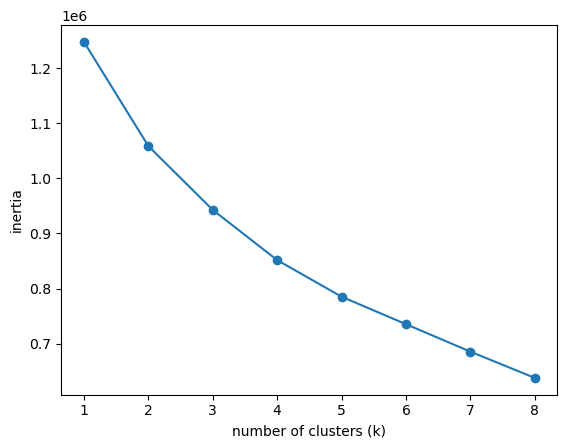

In [11]:
# Kmeans clustering 
num_clusters = list(range(1, 9))
inertias = []
for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(df_pcomp)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

In [12]:
# KMeans
model = KMeans(n_clusters=4)
model.fit(df_pcomp)
predictions = model.predict(df_pcomp)

C:\Users\liam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Add back to dataframe
df_pcomp['predictions'] = predictions
df_pcomp

is_electronics   is_home  is_clothing  is_books  product_price  \
0            -1.144490  0.921988    -1.579582  0.618172      -0.018378   
1            -0.440478 -0.131765     1.637901 -0.294376      -0.015633   
2            -0.110621 -0.729905    -0.147508 -0.541941      -0.011677   
3             0.096890 -1.023398    -1.049281 -0.710264       0.700216   
4             0.471507 -1.934708     0.517633 -0.089844       0.015834   
...                ...       ...          ...       ...            ...   
249995        0.229506 -0.695360    -0.201226  0.777490       0.698938   
249996        0.478670 -0.437676    -2.061031 -0.554351       0.013409   
249997       -0.123849  2.075464    -0.753223 -0.043962      -0.019441   
249998       -0.078310 -1.131869     0.531857 -0.898810      -0.692020   
249999       -0.638602  0.030368     1.356295 -0.167099       0.006421   

        quantity  total_purchased_amount  customer_age  predictions  
0      -0.527487                0.586549     -0.697619            2  
1      -0.520874                0.567849      0.717581            3  
2      -0.524824                0.571970      0.717681            1  
3      -0.505743               -0.413548     -0.003367            1  
4       0.473178                0.612385      0.715195            0  
...          ...                     ...           ...          ...  
249995 -0.502895               -0.419059     -0.003296            0  
249996  0.471288                0.614500      0.715407            0  
249997 -0.521093                0.567039      0.718260            2  
249998  0.527867               -0.377830     -0.006394            1  
249999  0.473292                0.627161     -0.699630            2  

[250000 rows x 9 columns]

C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

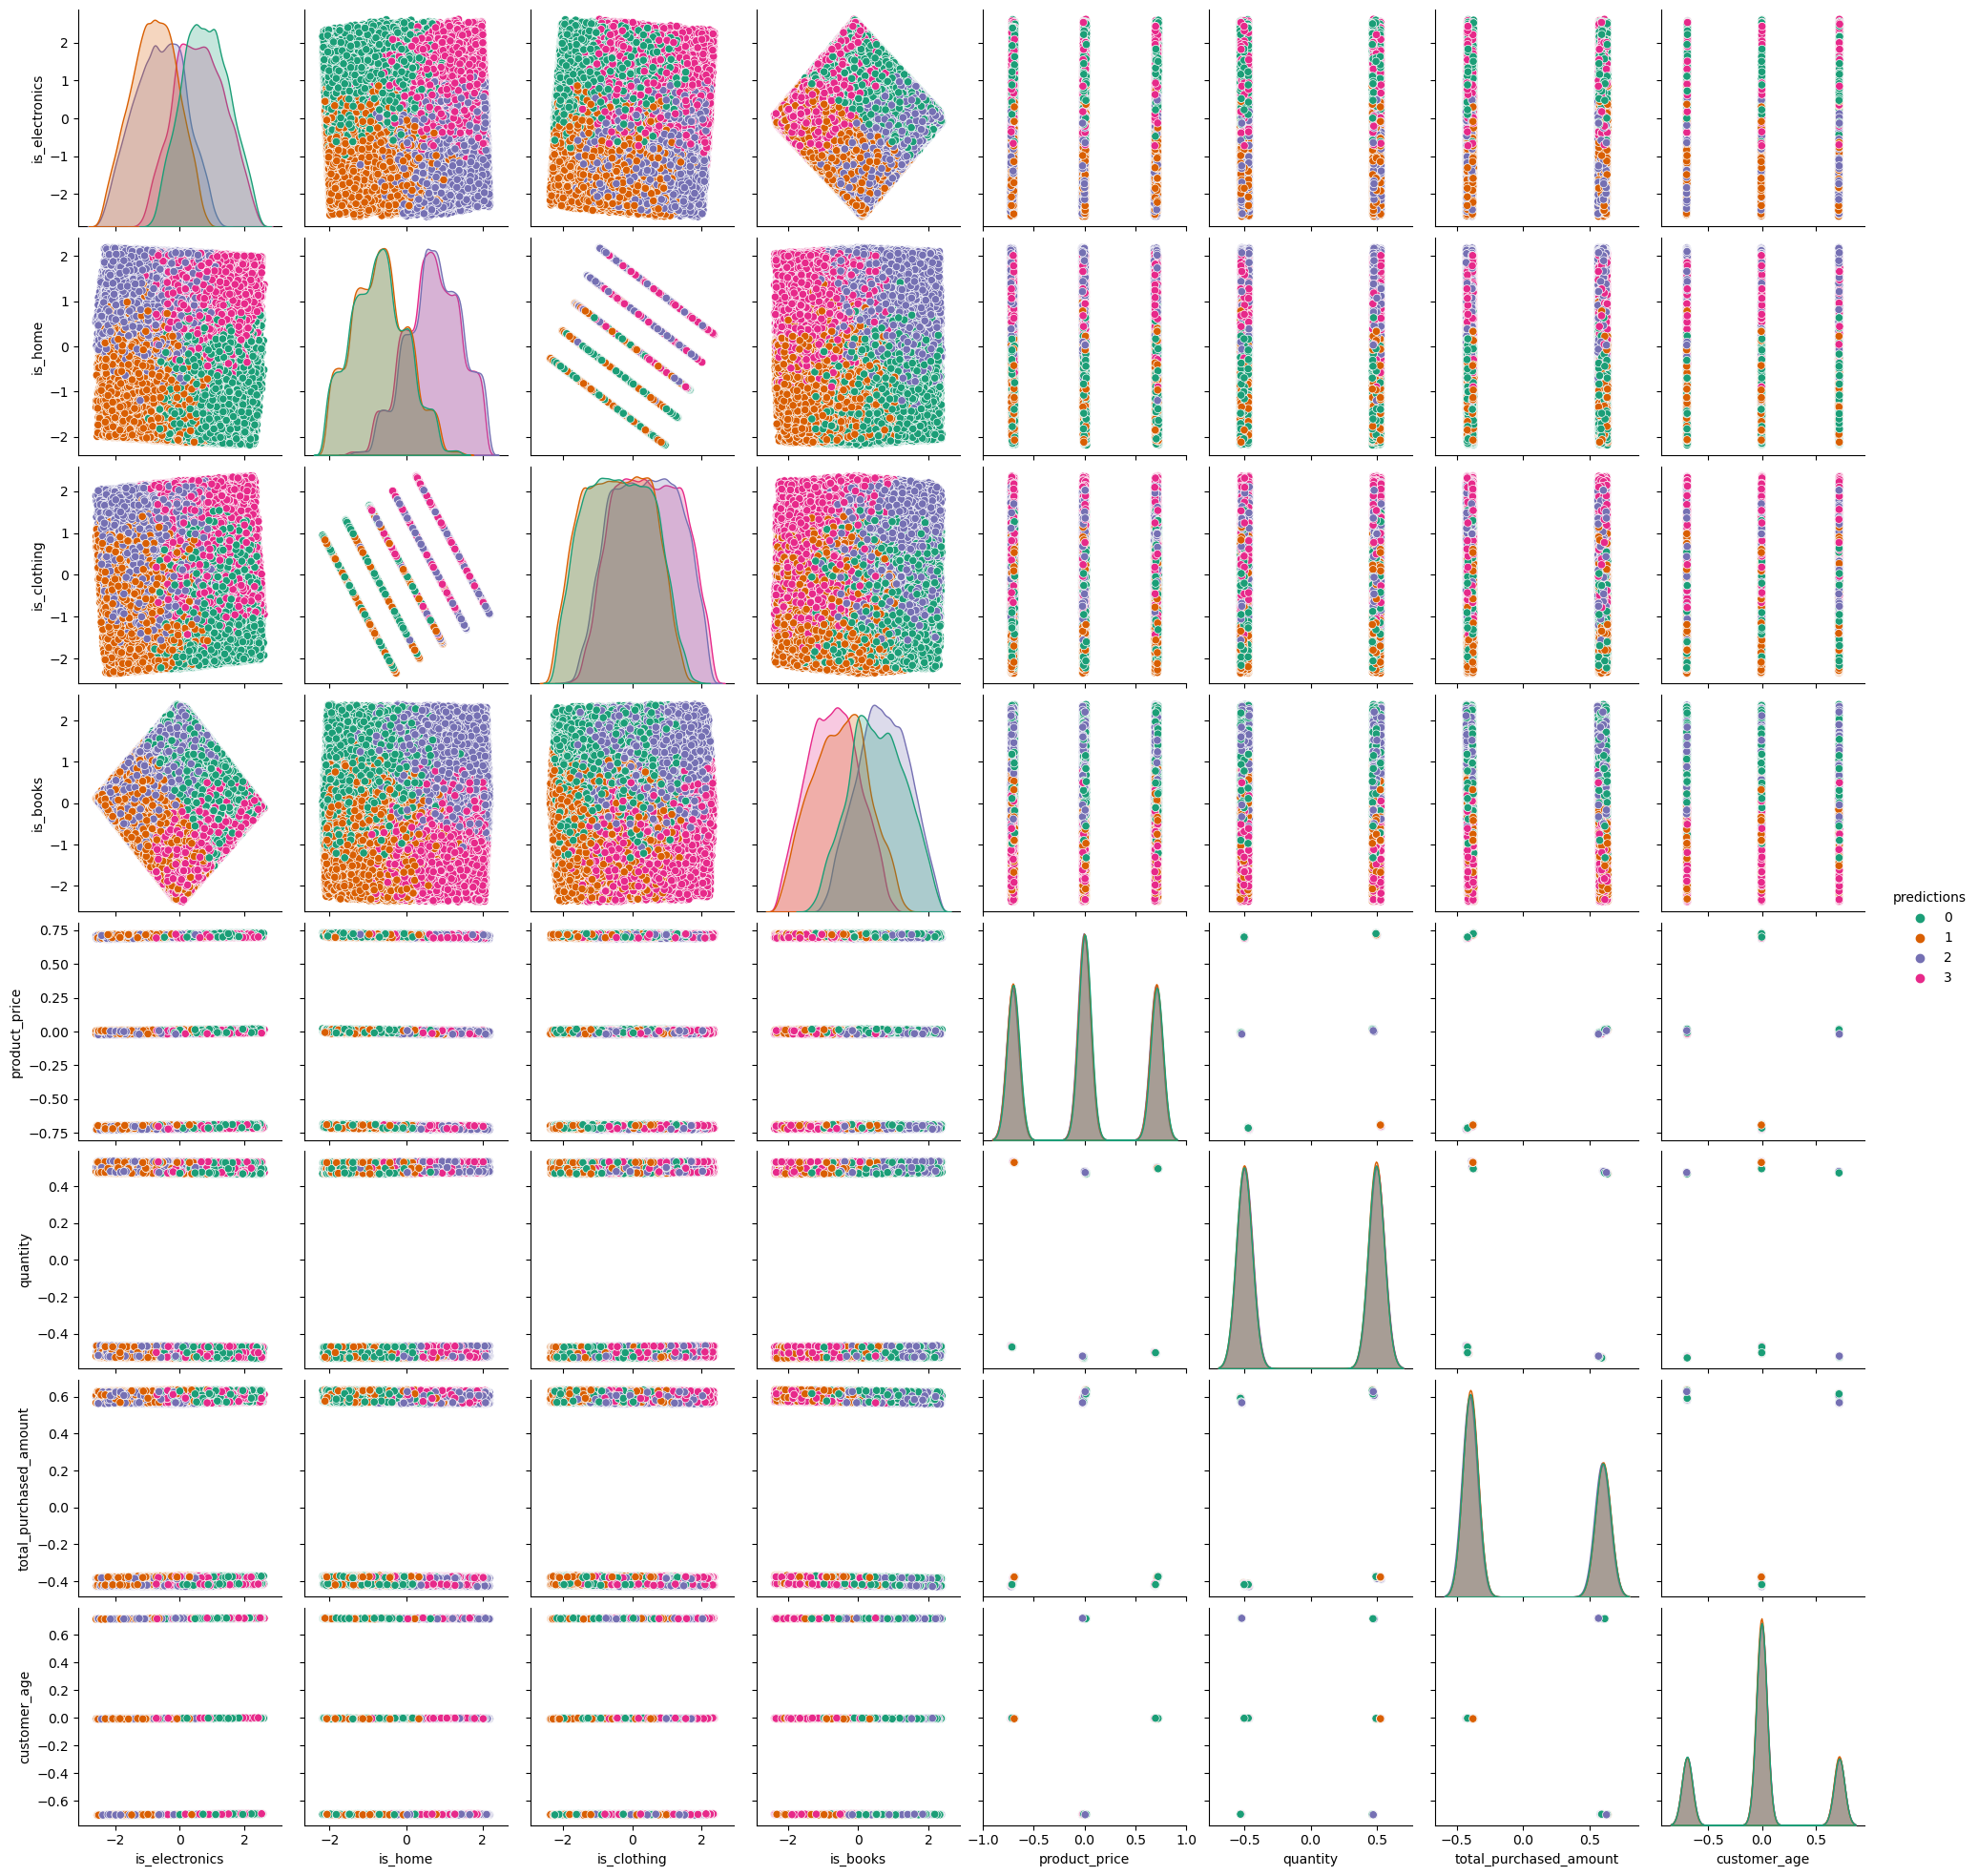

In [14]:
pp_segmented = sns.pairplot(df_pcomp, hue='predictions', palette='Dark2')
plt.show()

In [15]:
pp_segmented.savefig('Images/PCAKMC_ML.png', dpi=300, format='png')

In [16]:
# Initialize and fit BIRCH
birch_model = Birch()
birch_model.fit(df_pcomp)

# Get the centroids of the subclusters
centroids = np.array([node for node in birch_model.subcluster_centers_])

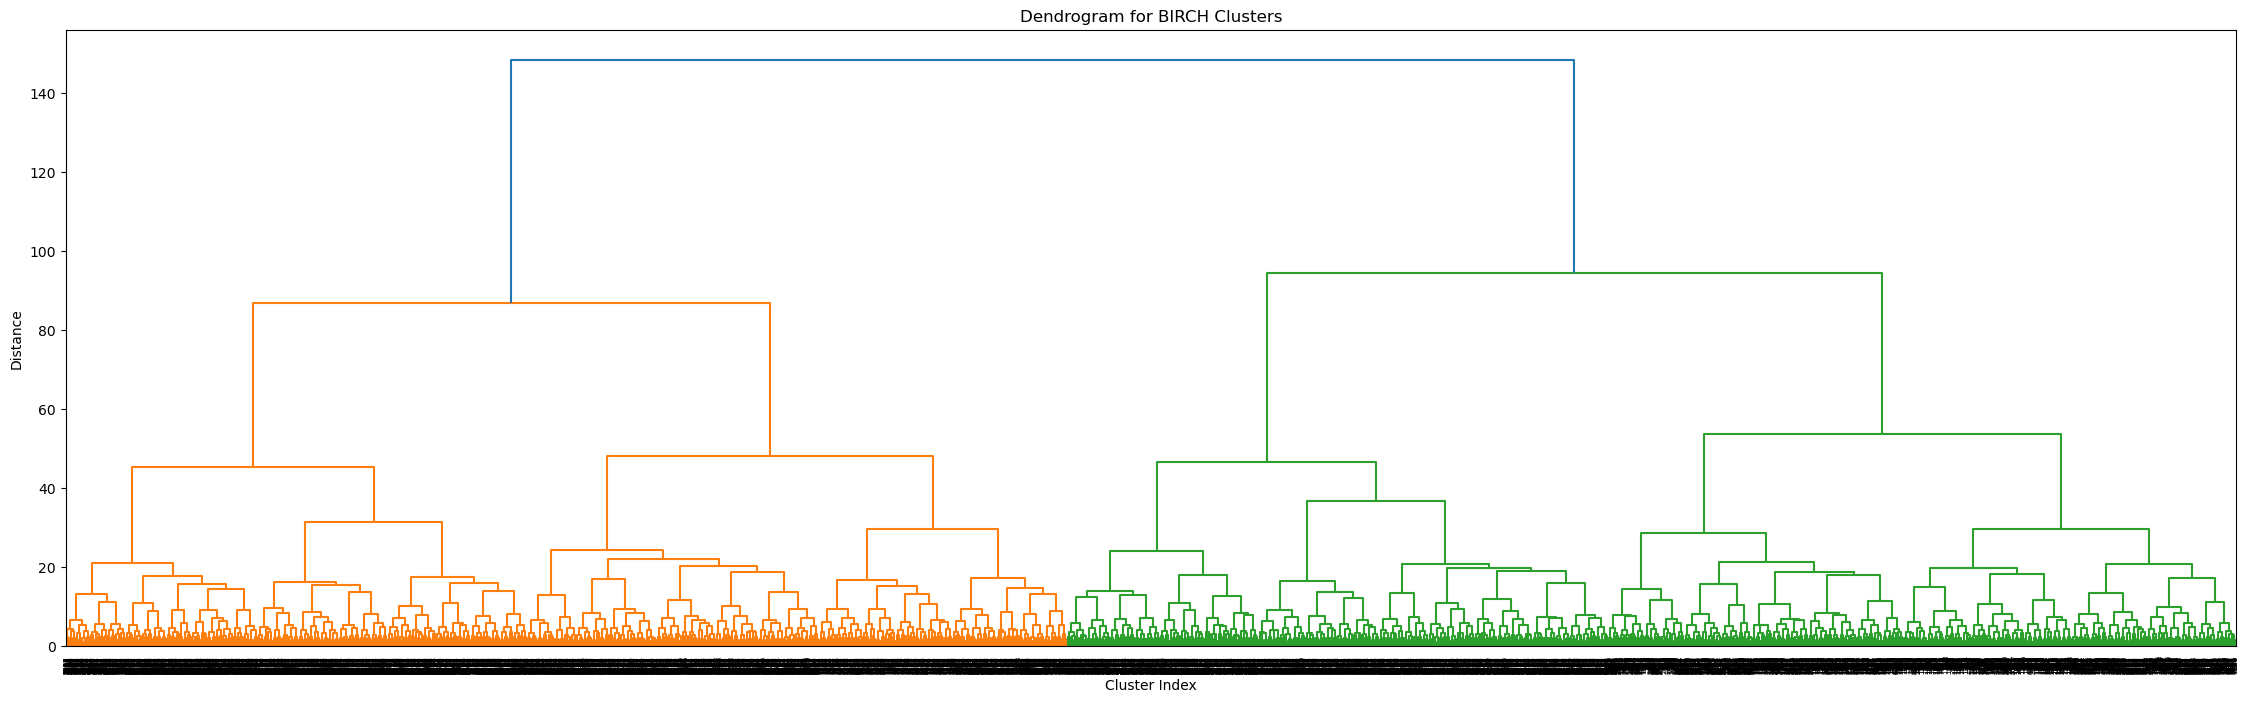

<Figure size 640x480 with 0 Axes>

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

# methods = ['single', 'complete', 'average', 'ward']
# for method in methods:
#     Z = linkage(centroids, method)
#     fig = plt.figure(figsize=(28,8))
#     dendrogram(Z)
#     plt.title('Dendrogram for BIRCH Clusters')
#     plt.xlabel('Cluster Index')
#     plt.ylabel('Distance')
#     plt.show()
#     plt.clf()

Z = linkage(centroids, 'ward')
fig = plt.figure(figsize=(28,8))
dendrogram(Z)
plt.title('Dendrogram for BIRCH Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()
plt.clf()

In [18]:
# Birch Clustering
km_predictions = df_pcomp['predictions']
df_pcomp.drop(['predictions'], axis=1)

birch_model = Birch(n_clusters=3)
birch_model.fit(df_pcomp)
birch_pred = birch_model.predict(df_pcomp)


In [19]:
# Cluster score
km_score = calinski_harabasz_score(df_pcomp, km_predictions)
birch_score = calinski_harabasz_score(df_pcomp, birch_pred)
print(km_score, birch_score)

69095.07740246327 70184.04688619936


In [20]:
# Refinement with SVM
from sklearn.svm import SVC

clf = SVC(kernel='rbf', gamma=0.5)
clf.fit(df_pcomp, km_predictions)
svc_predictions = clf.predict(df_pcomp)


C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\liam\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

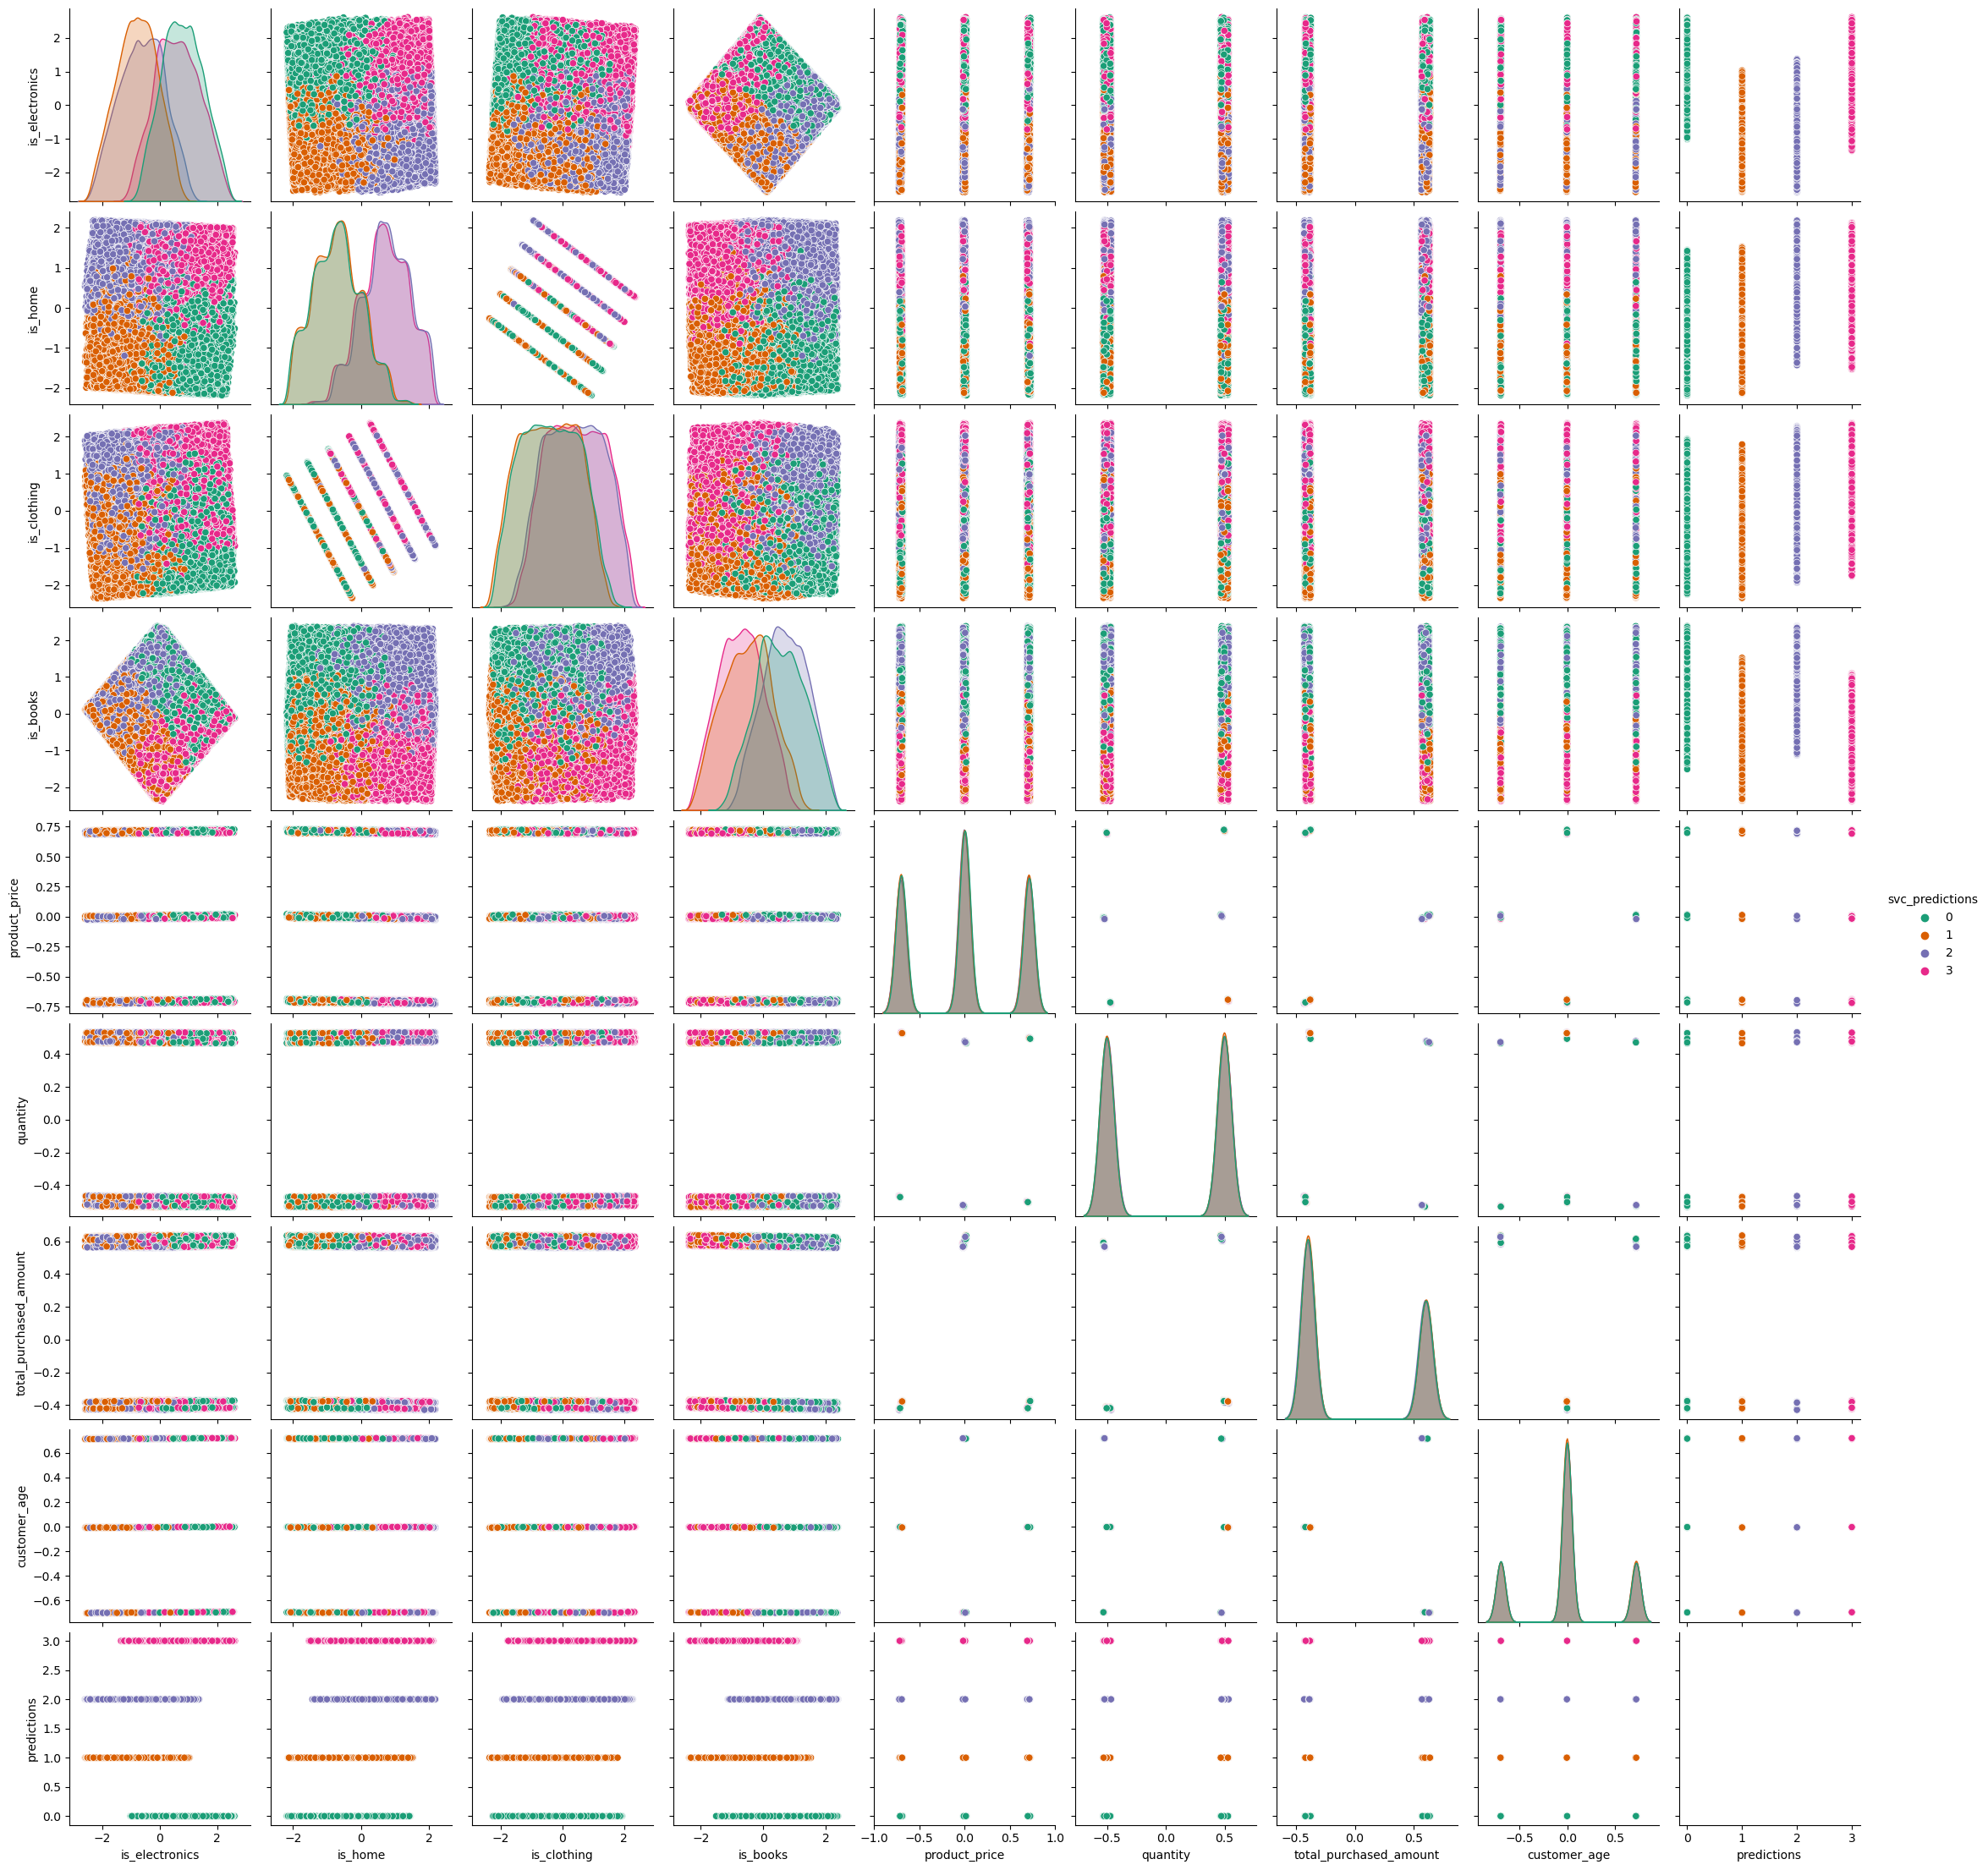

In [21]:
df_pcomp['svc_predictions'] = svc_predictions
pp_segmented_svc = sns.pairplot(df_pcomp, hue='svc_predictions', palette='Dark2')
plt.show()